# A data workflow example using Python

## Introduction
_some blurb about motivation and workflow_ **add at end when I know what I'm showing**


## Who am I ?
<div>
<img src="../../data/whoami.png" alt="wordcloud">
<div/>

## Demo format

- interrupt
- ask questions
- suggest different coding
- lets make this work, then break it, then fix it

In [1]:
# imports
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import plotly_express as px
from ipywidgets import interact

## A single data set

In [2]:
ls -l ../../data/ | grep -i "penobscot*"

-rw-r--r-- 1 geodev geodev 72559459 Dec 18 16:06 Penobscot_0-1000ms.npy
-rw-r--r-- 1 geodev geodev 27727545 Feb 17 15:03 penobscot_scroller.gif
-rw-r--r-- 1 geodev geodev  2654676 Feb 17 15:03 penobscot_scroller.mp4


In [3]:
vol = np.load('../../data/Penobscot_0-1000ms.npy')

In [4]:
type(vol)

numpy.ndarray

In [5]:
vol.shape

(601, 481, 251)

In [6]:
arr = np.random.randint(0, 100, size=(4,3,2))
print(arr.shape)
arr

(4, 3, 2)


array([[[96, 57],
        [72, 96],
        [93, 44]],

       [[29, 59],
        [89, 27],
        [32, 31]],

       [[54,  3],
        [77, 99],
        [13, 73]],

       [[91, 70],
        [17, 39],
        [37, 35]]])

In [7]:
arr[:,:,1] # a timeslice

array([[57, 96, 44],
       [59, 27, 31],
       [ 3, 99, 73],
       [70, 39, 35]])

In [8]:
arr[1,:,:] # an inline

array([[29, 59],
       [89, 27],
       [32, 31]])

In [9]:
arr[2,1,:] # a trace

array([77, 99])

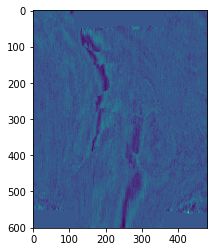

In [10]:
amp = vol[:, :, 200] # timeslice 200
plt.imshow(amp)

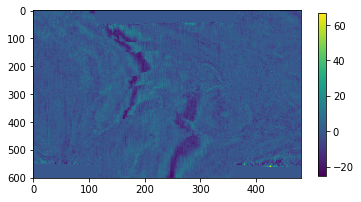

In [11]:
# Change the aspect ratio
plt.imshow(amp, aspect=0.5)
plt.colorbar(shrink=0.75)

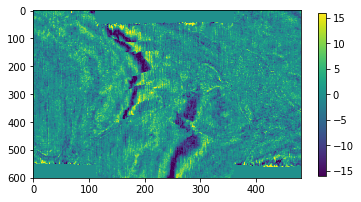

In [12]:
# Fix the the colobar
ma = np.percentile(vol, 98)
plt.imshow(amp, aspect=0.5, vmin=-ma, vmax=ma)
plt.colorbar(shrink=0.75)

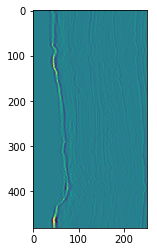

In [13]:
# plot an inline or crossline
plt.imshow(vol[200, :, :]) #inline 200

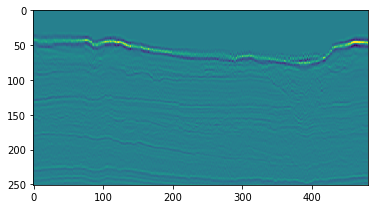

In [14]:
# Transpose the matrix
plt.imshow(vol[200, :, :].T)

In [15]:
arr.flatten()

array([96, 57, 72, 96, 93, 44, 29, 59, 89, 27, 32, 31, 54,  3, 77, 99, 13,
       73, 91, 70, 17, 39, 37, 35])

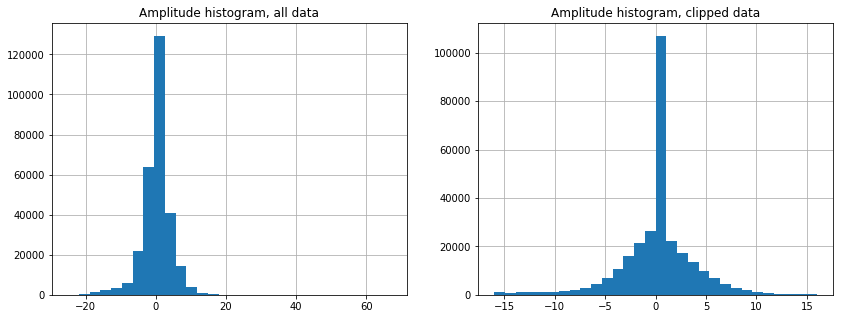

In [16]:
# histogram of amplitudes
fig, axs = plt.subplots(figsize=(14,5), nrows=1, ncols=2)

ax = axs[0]
ax.hist(amp.flatten(), bins=30, zorder=2)
ax.set_title('Amplitude histogram, all data')
ax.grid()

ax = axs[1]
ax.hist(amp.flatten(), bins=30, zorder=2, range=(-ma, ma))
ax.set_title('Amplitude histogram, clipped data')
ax.grid()

plt.show()

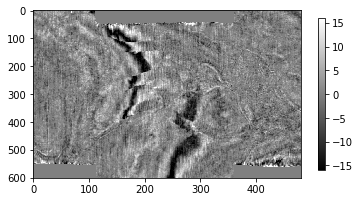

In [17]:
plt.imshow(amp, aspect=0.5, cmap='gray', vmin=-ma, vmax=ma)
plt.colorbar(shrink=0.7)

In [18]:
import plotter # see plotter.py for code

interactive(children=(Dropdown(description='colormap', options=('viridis', 'plasma', 'inferno', 'magma', 'Grey…

<div>
<img src="../../data/penobscot_scroller.gif" alt="scroller">
<div/>

### Load a single spreadsheet

What about data cleaning ? That data set was loaded and used 'out-of-the-box', that's rarely the case.

I have downloaded a \*.csv file containing "Saleable Production for the Troll field" as an example from the [Diskos DataBrowser](https://portal.diskos.cgg.com/whereoil-data/) supplied by the [Norwegian Petroleum Directorate](https://www.npd.no/)

In [19]:
df = pd.read_csv('../../data/Troll_SaleableProduction.csv', sep='|')
df.head()

Name                Month             Product        Volume Volume Uom  \
0  TROLL  2019-01-01T00:00:00           gas - dry  3.477326e+09        Sm3   
1  TROLL  2019-01-01T00:00:00           oil - net  5.791970e+05        Sm3   
2  TROLL  2019-01-01T00:00:00  natural gas liquid  1.358320e+05        Sm3   
3  TROLL  2019-02-01T00:00:00  natural gas liquid  1.185770e+05        Sm3   
4  TROLL  2019-02-01T00:00:00           gas - dry  3.126496e+09        Sm3   

           Mass Mass Uom  Density Density Uom        Energy Energy Uom  \
0  2.527503e+09       kg    0.727      kg/Sm3  1.340403e+11         MJ   
1  4.925810e+08       kg  850.456      kg/Sm3           NaN        NaN   
2  8.444951e+07       kg  621.722      kg/Sm3  4.154710e+09         MJ   
3  7.398564e+07       kg  623.945      kg/Sm3  3.640573e+09         MJ   
4  2.273103e+09       kg    0.727      kg/Sm3  1.205547e+11         MJ   

   Gross Calorific Value  Gross Calorific Value Uom Share Country  
0                    NaN                        NaN        NORWAY  
1                    NaN                        NaN        NORWAY  
2                    NaN                        NaN        NORWAY  
3                    NaN                        NaN        NORWAY  
4                    NaN                        NaN        NORWAY

### Inspect and clean data numerically

In [20]:
df.describe()

Volume          Mass     Density        Energy  \
count  8.630000e+02  8.160000e+02  702.000000  5.030000e+02   
mean   7.381843e+08  8.200451e+08  572.834007  5.038512e+10   
std    1.182824e+09  7.994361e+08  344.745592  4.961081e+10   
min    0.000000e+00  7.890000e+05    0.722000  0.000000e+00   
25%    1.182615e+05  7.242702e+07  591.499500  3.333468e+09   
50%    7.025870e+05  5.505180e+08  637.700000  4.347321e+10   
75%    1.493428e+09  1.401523e+09  850.002250  9.610639e+10   
max    3.743892e+09  2.722635e+09  891.538000  1.444837e+11   

       Gross Calorific Value  Gross Calorific Value Uom  
count                    0.0                        0.0  
mean                     NaN                        NaN  
std                      NaN                        NaN  
min                      NaN                        NaN  
25%                      NaN                        NaN  
50%                      NaN                        NaN  
75%                      NaN                        NaN  
max                      NaN                        NaN

In [21]:
df.columns

Index(['Name', 'Month', 'Product', 'Volume', 'Volume Uom', 'Mass', 'Mass Uom',
       'Density', 'Density Uom', 'Energy', 'Energy Uom',
       'Gross Calorific Value', 'Gross Calorific Value Uom', 'Share Country'],
      dtype='object')

In [22]:
df = df.drop(columns=['Gross Calorific Value', 'Gross Calorific Value Uom'])

In [23]:
df.describe(percentiles=[.1,.5,.9])

Volume          Mass     Density        Energy
count  8.630000e+02  8.160000e+02  702.000000  5.030000e+02
mean   7.381843e+08  8.200451e+08  572.834007  5.038512e+10
std    1.182824e+09  7.994361e+08  344.745592  4.961081e+10
min    0.000000e+00  7.890000e+05    0.722000  0.000000e+00
10%    4.884140e+04  3.122300e+07    0.726000  1.993579e+09
50%    7.025870e+05  5.505180e+08  637.700000  4.347321e+10
90%    2.887313e+09  2.122708e+09  883.500000  1.261204e+11
max    3.743892e+09  2.722635e+09  891.538000  1.444837e+11

In [24]:
df.head()

Name                Month             Product        Volume Volume Uom  \
0  TROLL  2019-01-01T00:00:00           gas - dry  3.477326e+09        Sm3   
1  TROLL  2019-01-01T00:00:00           oil - net  5.791970e+05        Sm3   
2  TROLL  2019-01-01T00:00:00  natural gas liquid  1.358320e+05        Sm3   
3  TROLL  2019-02-01T00:00:00  natural gas liquid  1.185770e+05        Sm3   
4  TROLL  2019-02-01T00:00:00           gas - dry  3.126496e+09        Sm3   

           Mass Mass Uom  Density Density Uom        Energy Energy Uom  \
0  2.527503e+09       kg    0.727      kg/Sm3  1.340403e+11         MJ   
1  4.925810e+08       kg  850.456      kg/Sm3           NaN        NaN   
2  8.444951e+07       kg  621.722      kg/Sm3  4.154710e+09         MJ   
3  7.398564e+07       kg  623.945      kg/Sm3  3.640573e+09         MJ   
4  2.273103e+09       kg    0.727      kg/Sm3  1.205547e+11         MJ   

  Share Country  
0        NORWAY  
1        NORWAY  
2        NORWAY  
3        NORWAY  
4        NORWAY

In [25]:
type(df.Month[0])

str

In [26]:
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
df.head()

Name             Product        Volume Volume Uom          Mass  \
Month                                                                          
2019-01-01  TROLL           gas - dry  3.477326e+09        Sm3  2.527503e+09   
2019-01-01  TROLL           oil - net  5.791970e+05        Sm3  4.925810e+08   
2019-01-01  TROLL  natural gas liquid  1.358320e+05        Sm3  8.444951e+07   
2019-02-01  TROLL  natural gas liquid  1.185770e+05        Sm3  7.398564e+07   
2019-02-01  TROLL           gas - dry  3.126496e+09        Sm3  2.273103e+09   

           Mass Uom  Density Density Uom        Energy Energy Uom  \
Month                                                               
2019-01-01       kg    0.727      kg/Sm3  1.340403e+11         MJ   
2019-01-01       kg  850.456      kg/Sm3           NaN        NaN   
2019-01-01       kg  621.722      kg/Sm3  4.154710e+09         MJ   
2019-02-01       kg  623.945      kg/Sm3  3.640573e+09         MJ   
2019-02-01       kg    0.727      kg/Sm3  1.205547e+11         MJ   

           Share Country  
Month                     
2019-01-01        NORWAY  
2019-01-01        NORWAY  
2019-01-01        NORWAY  
2019-02-01        NORWAY  
2019-02-01        NORWAY

In [28]:
df['Month'] = df.index
df.sort_index(inplace=True)

### Inspect data visually

In [30]:
px.scatter(df, x='Month', y='Mass', color='Product', title='TROLL Saleable Production')

## Load a larger data set

Repeat steps above

In [31]:
df_tot = pd.read_csv('../../data/Total_Saleable_prod.csv', sep='|')
df_tot.head()

Name                Month        Product     Volume Volume Uom  \
0   GINA KROG  2019-01-01T00:00:00      gas - dry  2293436.0        Sm3   
1  VISUND SØR  2019-01-01T00:00:00      isobutane     1451.0        Sm3   
2      BALDER  2019-01-01T00:00:00      oil - net   141419.0        Sm3   
3        TUNE  2019-01-01T00:00:00         naphta        7.0        Sm3   
4       SKARV  2019-01-01T00:00:00  normal butane    10718.0        Sm3   

          Mass Mass Uom  Density Density Uom       Energy Energy Uom  \
0    3354775.0       kg    1.463      kg/Sm3  172090830.0         MJ   
1     816827.0       kg  562.876      kg/Sm3   40313033.0         MJ   
2  125434334.0       kg  886.960      kg/Sm3          NaN        NaN   
3       5000.0       kg  690.800      kg/Sm3          NaN        NaN   
4    6264365.0       kg  584.491      kg/Sm3  310084639.0         MJ   

   Gross Calorific Value Gross Calorific Value Uom Share Country  
0                    NaN                       NaN        NORWAY  
1                    NaN                       NaN        NORWAY  
2                    NaN                       NaN        NORWAY  
3                    NaN                       NaN        NORWAY  
4                    NaN                       NaN        NORWAY

In [32]:
df_tot = df_tot.drop(columns=['Gross Calorific Value', 'Gross Calorific Value Uom'])
df_tot['Month'] = pd.to_datetime(df_tot['Month'])
df_tot = df_tot.set_index('Month')
df_tot['Month'] = df_tot.index
df_tot.sort_index(inplace=True)

In [37]:
px.scatter(df_tot, x='Month', y='Mass', color='Product', title='All Fields - Saleable Production')

In [34]:
df_tot.Product.unique()

array(['oil - net', 'gas - dry', 'condensate - net', 'isobutane',
       'propane', 'ethane', 'normal butane', 'naphta',
       'liquified petroleum gas', 'natural gas liquid',
       'liquified natural gas', 'gas - wet', 'gas'], dtype=object)

In [36]:
@interact(fieldname=sorted(df_tot.Name.unique()))
def plot_field(fieldname):
    fig, axs = plt.subplots(figsize=(18, 8), nrows=2, ncols=2, sharex=True)
    axs = axs.flatten()
    products = ['oil - net', 'gas - dry', 'condensate - net', 'gas - wet']
    
    for ax, product in zip(axs, products):
        ax.set_title(f'{fieldname}: {product}')
        ax.plot(df_tot.index[(df_tot['Name'] == fieldname) & (df_tot['Product'] == product)],
                df_tot.Mass[(df_tot['Name'] == fieldname) & (df_tot['Product'] == product)])
        ax.grid()
        ax.set_ylim(bottom=0)

    return None

interactive(children=(Dropdown(description='fieldname', options=('33/9-6 DELTA', '7220/11-1 (Alta)', 'AASTA HA…

In [38]:
@interact(fields=sorted(df_tot.Name.unique()))
def xpress_plot(fields):
    plot = px.line(df_tot[df_tot.Name == fields],
                   x='Month',
                   y='Mass',
                   color='Product',
                   title=f'{fields} Saleable production', )
    return plot

interactive(children=(Dropdown(description='fields', options=('33/9-6 DELTA', '7220/11-1 (Alta)', 'AASTA HANST…

In [41]:
df_tot.shape, df_tot.size

((97253, 12), 1167036)

## Scale up - scrape data from the web

- static data?
- data stream?

### Clean the data

### Inspect data numerically

### Inspect data visually

## Make analysis accessible

## A simple web app

## Conclusions

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50">
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
    <img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png"/>
</div>
    
<br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License
</a>.